In [16]:
import requests
import time
import numpy as np
import matplotlib.pyplot as plt

Countries and indicators to compare

In [17]:
#countries = ['SRB', 'HRV',  'BIH', 'MKD', 'ALB', 'BGR', 'ROM', 'SVN', 'GRC', 'HUN']
countries = ['SRB', 'HRV', 'BIH', 'MKD', 'ALB', 'BGR', 'ROM', 'HUN']

indicators = [
    'NY.GDP.MKTP.CD',       # GDP
    'NY.GDP.PCAP.CD',       # GDP per capita
    'NY.GDP.PCAP.KD.ZG',    # GDP per capita growth (annual %)
    #'NY.GDP.MKTP.PP.CD',    # PPP
    'NY.GDP.PCAP.PP.CD',    # PPP per capita
    #'NY.GNP.MKTP.CD',       # GNI
    'NY.GNP.MKTP.PC.CD',    # GNI per capita
    #'3.0.Gini',             # GINI
    'VC.IHR.PSRC.P5',       # Intentional homicides (per 100,000 people)
    'SL.UEM.TOTL.ZS',       # Unemployment, total (% of total labor force)
    'SP.POP.TOTL'           # Population, total'
    ]

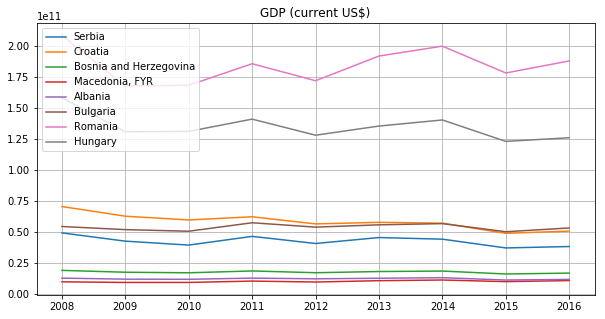

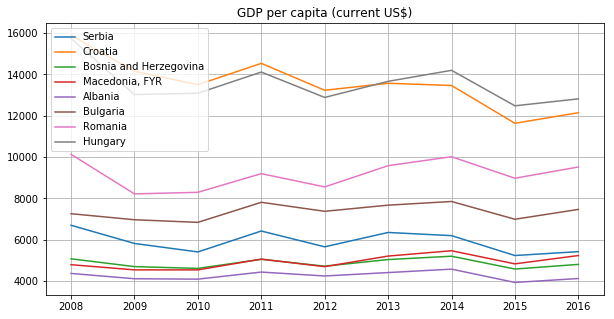

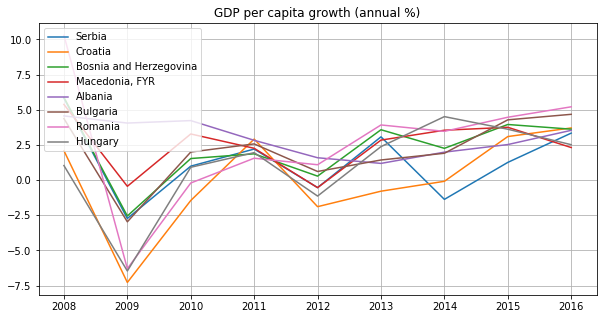

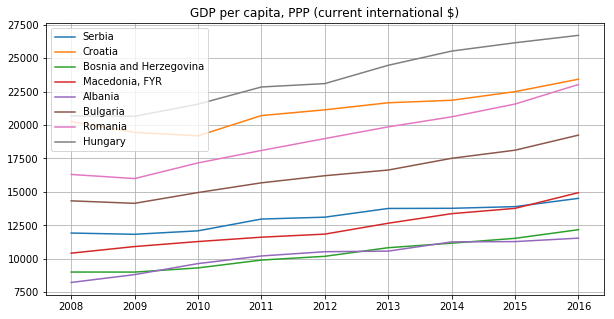

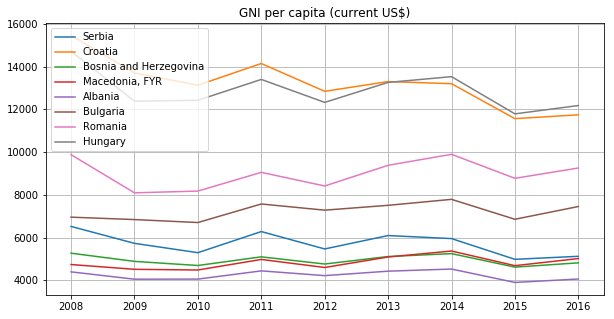

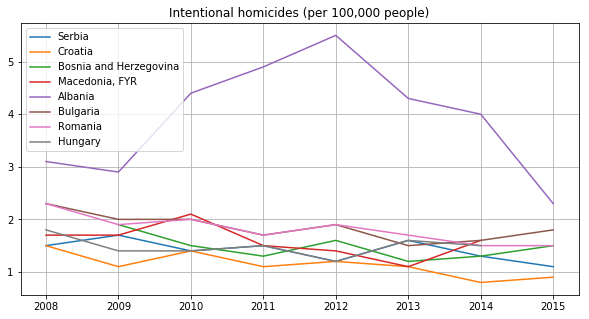

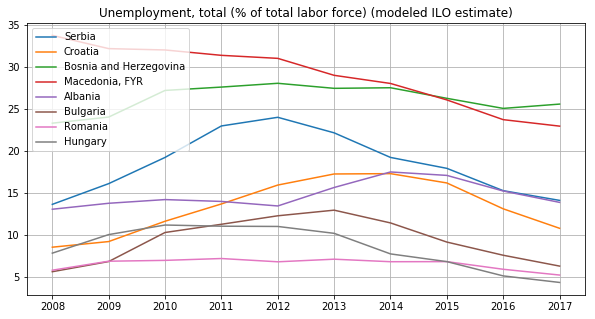

In [22]:
def get_country_indicator(country_code, indicator):
    #url = 'http://api.worldbank.org/v2/countries/{}/indicators/{}?format=json'.format(country_code, indicator)
    url = 'http://api.worldbank.org/v2/countries/{}/indicators/{}?date=2008:2020&format=json'.format(country_code, indicator)
    #print('GET: ' + url)
    json_response = requests.get(url).json()
    time.sleep(0.5)
    return json_response

def parse_response(json_response):
    values = [[json_response[1][i]['date'], json_response[1][i]['value']] for i in range(len(json_response[1]))]
    country_name = json_response[1][0]['country']['value']
    indicator_name = json_response[1][0]['indicator']['value']
    return np.array(values), country_name, indicator_name

for indicator in indicators:
    fig = plt.figure(figsize=(10,5))
    for country in countries:
        json_response = get_country_indicator(country, indicator)
        values, country_name, indicator_name = parse_response(json_response)
        plt.plot(values[:,0], values[:,1].astype(np.float), label=country_name)

    plt.title(indicator_name)
    plt.legend(loc=2)
    plt.grid()
    plt.show()